# Project 4 - Titanic Survival Analysis

**Column details:**

* `Passengerid` : Self Explanatory
* `Survived` : Self Explanatory
* `pclass` : Ticket class
* `sex` : Gender
* `Age` : Age in years
* `sibsp` : # of siblings / spouses aboard the Titanic
* `parch` : # of parents / children aboard the Titanic
* `ticket` : Ticket number
* `fare` : Passenger fare
* `cabin` : Cabin number
* `embarked` : Port of Embarkation

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_summary import DataFrameSummary

In [2]:
df = pd.read_csv("Titanic_survival.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dfs = DataFrameSummary(df)
dfs.summary()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,NaN,NaN,714,891,891,NaN,891,NaN,NaN
mean,446,0.383838,2.30864,NaN,NaN,29.6991,0.523008,0.381594,NaN,32.2042,NaN,NaN
std,257.354,0.486592,0.836071,NaN,NaN,14.5265,1.10274,0.806057,NaN,49.6934,NaN,NaN
min,1,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,223.5,0,2,NaN,NaN,20.125,0,0,NaN,7.9104,NaN,NaN
50%,446,0,3,NaN,NaN,28,0,0,NaN,14.4542,NaN,NaN
75%,668.5,1,3,NaN,NaN,38,1,0,NaN,31,NaN,NaN
max,891,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,891,891,891,891,891,714,891,891,891,891,204,889
uniques,891,2,3,891,2,88,7,7,681,248,147,3


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [9]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [11]:
df.drop(["Cabin","Name","Ticket"], axis=1, inplace=True)

In [12]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [14]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
df["Embarked"] = df["Embarked"].dropna(axis=0)

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [20]:
df["Embarked"] = df["Embarked"].fillna("A")

In [21]:
print(df[df["Embarked"] == "A"].index.values)

[ 61 829]


In [22]:
df["Embarked"].drop([61,829], axis=0, inplace=True)

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [24]:
df["Age"] = df["Age"].round(2)

In [25]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [26]:
df["Age"] = df["Age"].round(2)

In [27]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,29.7,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [28]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Apply label-encoding on categorical data

In [30]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df["Sex"] = labelencoder.fit_transform(df["Sex"])
df["Embarked"] = labelencoder.fit_transform(df["Embarked"])

In [31]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,3
3,4,1,1,0,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,3
887,888,1,1,0,19.0,0,0,30.0000,3
888,889,0,3,0,29.7,1,2,23.4500,3
889,890,1,1,1,26.0,0,0,30.0000,1


In [32]:
df.drop("PassengerId", axis=1, inplace=True)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,3
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,3
3,1,1,0,35.0,1,0,53.1000,3
4,0,3,1,35.0,0,0,8.0500,3


## Creating training and testing dataset

In [34]:
X = df.drop("Survived", axis=1)
Y = df.Survived

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

## Model Initialization

In [36]:
from sklearn.linear_model import LogisticRegression

logisticmodel = LogisticRegression()
logisticmodel.fit(X_train,Y_train)

print("Train Accuraccy: ", logisticmodel.score(X_train,Y_train))
print("Test Accuraccy: ", logisticmodel.score(X_test,Y_test))

Train Accuraccy:  0.8019662921348315
Test Accuraccy:  0.8100558659217877


In [37]:
y_preds = logisticmodel.predict(X_test)
y_preds[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [38]:
Y_test[:5]

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [39]:
X_test.shape

(179, 7)

In [40]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score, classification_report

confusion_matrix(y_preds,Y_test)

array([[90, 19],
       [15, 55]], dtype=int64)

Text(22.5, 0.5, 'Predicted Value')

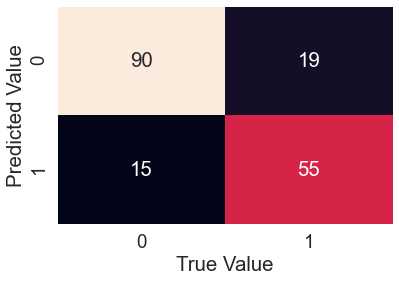

In [42]:
sns.heatmap(confusion_matrix(y_preds,Y_test), annot=True, cbar=False)
sns.set(font_scale=1.9)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

In [43]:
print(classification_report(y_preds,Y_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       109
           1       0.74      0.79      0.76        70

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



### Slope, Intercept, MSE, MAE, RMSE, R2 score

In [44]:
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
import math

mse = mean_squared_error(Y_test,y_preds)
mae = mean_absolute_error(Y_test,y_preds)
rmse = math.sqrt(mse)
r2 = r2_score(Y_test,y_preds)


print("Accuracy Score:",accuracy_score(y_preds,Y_test))
print("slope:",logisticmodel.coef_)
print("intercept: ",logisticmodel.intercept_)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

Accuracy Score: 0.8100558659217877
slope: [[-9.30408592e-01 -2.59264338e+00 -3.12700220e-02 -2.94452943e-01
  -1.14293780e-01  2.45135845e-03 -2.31816719e-01]]
intercept:  [4.84286843]
Mean Squared Error:  0.18994413407821228
Mean Absolute Error:  0.18994413407821228
Root Mean Squared Error:  0.43582580703557733
R2 Score:  0.2167310167310167
